In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt

In [2]:
def find_similar(points):
    similar = []
    for j,point_j in enumerate(points.T):
        similar_j = []
        for i,point_i in enumerate(points.T):
            if (math.isclose(point_i[3], point_j[3])):
                if i != j:
                    similar_j.append(i)
        similar.append(similar_j)
    return similar

In [3]:

def rotation_matrix_arbitrary_axis(axis, angle):
    """
    Returns a 3D rotation matrix for rotating around an arbitrary axis by a given angle (in radians).
    
    :param axis: A 3D unit vector representing the axis of rotation (array-like or list).
    :param angle: The angle in radians by which to rotate.
    :return: A 3x3 rotation matrix.
    """
    axis = np.array(axis)
    axis = axis / np.linalg.norm(axis)  # Ensure the axis is a unit vector
    
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    one_minus_cos = 1 - cos_theta
    
    # Skew-symmetric matrix of the axis
    K = np.array([
        [0, -axis[2], axis[1]],
        [axis[2], 0, -axis[0]],
        [-axis[1], axis[0], 0]
    ])
    
    # Outer product of the axis
    outer_product = np.outer(axis, axis)
    
    # Rotation matrix using Rodrigues' formula
    R = cos_theta * np.eye(3) + one_minus_cos * outer_product + sin_theta * K
    
    return R

def rotate_vector_arbitrary_axis(vector, axis, angle):
    """
    Rotates a 3D vector around an arbitrary axis by a given angle (in radians).
    
    :param vector: A 3D vector to rotate (as a list or numpy array).
    :param axis: A 3D unit vector representing the axis of rotation.
    :param angle: The angle in radians by which to rotate the vector.
    :return: The rotated 3D vector.
    """
    rot_matrix = rotation_matrix_arbitrary_axis(axis, angle)
    rotated_vector = np.dot(rot_matrix, vector)
    return rotated_vector

be the function, $|z|$, an isosurface is then an infinite plane in x and y at the level z + 1 or -1.

Now we plot the function z on a sphere.

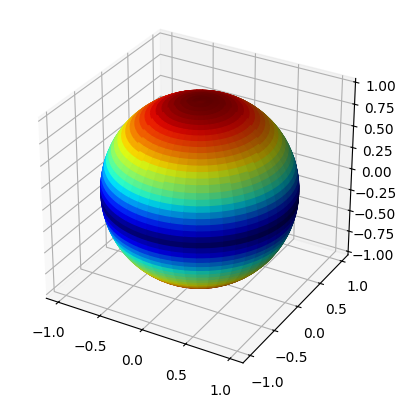

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

res = 100

# Make data
phi = np.linspace(0, 2 * np.pi, res)
theta = np.linspace(0, np.pi, res)
x = 1 * np.outer(np.cos(phi), np.sin(theta)) # -> the are sorted by z coordinate, each line contains values of one sin(theta)
y = 1 * np.outer(np.sin(phi), np.sin(theta)) # -> the are sorted by z coordinate, each line contains values of one sin(theta)
z = 1 * np.outer(np.ones(np.size(phi)), np.cos(theta)) 
a = 1 * np.outer(np.ones(np.size(phi)),  abs(np.cos(theta))) 


# Plot the surface
norm = plt.Normalize()
facecolors = plt.cm.jet(norm(a))
ax.plot_surface(x, y, z, facecolors=facecolors)

# Set an equal aspect ratio
ax.set_aspect('equal')

plt.show()

(10, 10)


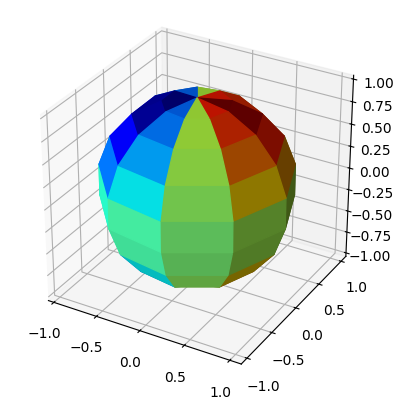

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

res = 10

# Make data
phi = np.linspace(0, 2 * np.pi, res)
theta = np.linspace(0, np.pi, res)
x = 1 * np.outer(np.cos(phi), np.sin(theta)) # -> the are sorted by z coordinate, each line contains values of one sin(theta)
y = 1 * np.outer(np.sin(phi), np.sin(theta)) # -> the are sorted by z coordinate, each line contains values of one sin(theta)
z = 1 * np.outer(np.ones(np.size(phi)), np.cos(theta)) 
a = 1 * np.outer(np.cos(phi),  abs(np.cos(theta))) 

print(x.shape)

# Plot the surface
norm = plt.Normalize()
facecolors = plt.cm.jet(norm(a))
ax.plot_surface(x, y, z, facecolors=facecolors)

# Set an equal aspect ratio
ax.set_aspect('equal')

plt.show()

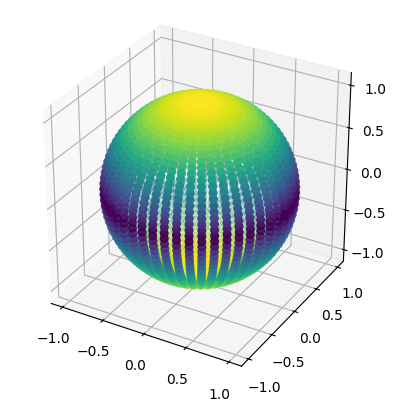

In [6]:
# rotate pointset
cm = plt.get_cmap("RdYlGn")

res = 50

# Make data
phis = np.linspace(0, 2 * np.pi, res)
thetas = np.linspace(0, np.pi, res)
x,y,z,col = np.empty((0)), np.empty((0)),np.empty((0)), np.empty((0))

for phi in phis:
    for theta in thetas:
        x =  np.append(x,np.cos(phi)*np.sin(theta))
        y =  np.append(y,np.sin(phi)*np.sin(theta))
        z =  np.append(z,np.cos(theta))
        col = np.append(col,np.abs(np.cos(theta)))
        # now apply rotation

points = np.vstack((np.vstack((np.vstack((x,y)),z)),col))

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(points[0,:], points[1,:], points[2,:], s=30, c=points[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')

plt.show()

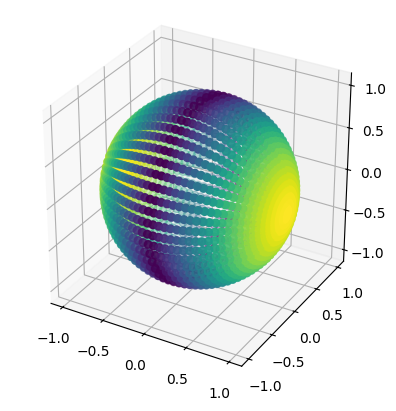

In [7]:
# rotate points around y and plot 

rot_mat = rotation_matrix_arbitrary_axis(np.asarray([0,1,0]), 1.5708)
points = np.vstack((rot_mat@points[0:3,:],col))
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(points[0,:], points[1,:], points[2,:], s=30, c=points[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')

plt.show()

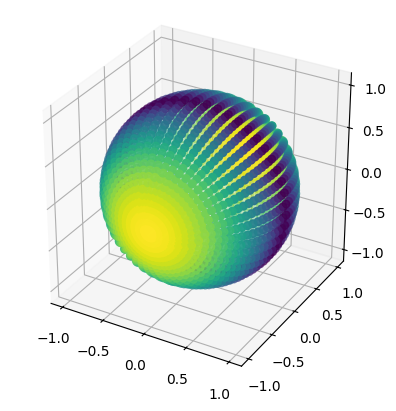

In [8]:
# rotate points around z and plot 

rot_mat = rotation_matrix_arbitrary_axis(np.asarray([0,0,1]), 1.5708)
points = np.vstack((rot_mat@points[0:3,:],col))
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(points[0,:], points[1,:], points[2,:], s=30, c=points[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')

plt.show()

[0.00108219 0.02992027 0.6905331 ] 0.7460722134830368


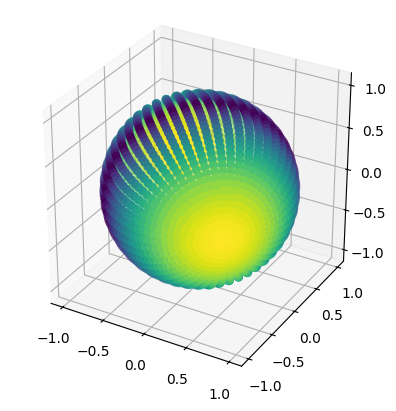

In [9]:
# rotate points around arbitrary axis and angle and plot 
import random

r_axis = np.asarray([np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1))])
r_angle = random.uniform(0,1.5708)

print(r_axis, r_angle)

rot_mat = rotation_matrix_arbitrary_axis(r_axis, r_angle)
points = np.vstack((rot_mat@points[0:3,:],col))
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(points[0,:], points[1,:], points[2,:], s=30, c=points[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')

plt.show()

In [10]:
import math
for j,point_j in enumerate(points.T):
    for i,point_i in enumerate(points.T):
        if (math.isclose(point_i[3], point_j[3])):
            pass
            # print(j, i)
        #print(point_i[3]-point_j[3])
    


But this is not the real test, the real test copmes when you have longitudinals that arent  longitudinals. This means points of a circle can not belong to the same z. Create a second ball inside the first, which is rotated with respect to the first ball. then evaluate values of the first ball. Rotate ball, then evaluate z.

[-0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.7348558
 -0.7348558  0.7348558 -0.7348558  0.7348558 -0.7348558  0.734

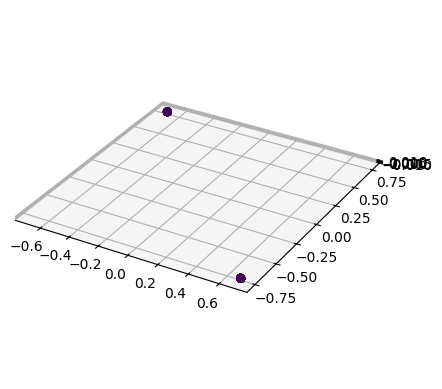

In [23]:
similar_points = find_similar(points)



wiggers = []
for i in similar_points[0]:
    wiggers.append(points.T[i,:])
wiggers = np.asarray(wiggers)

print(wiggers[:,1])

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(wiggers[:,0], wiggers[:,1], wiggers[:,2], s=30, c=wiggers[:,3], marker='o')                                                                                
ax3D.set_aspect('equal')

plt.show()  